# Preprocessing of tweets

Preprocessing and analysis of Wikipedia comments [15]. Download file [train.csv.zip](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data?select=train.csv.zip) and place it in a folder outside of repository in the same directory as repository. Rename it to *wiki_train.csv*. So the file tree should look like:

```
*
|- nlp-project (Repository folder)
|- wiki_train.csv
-
```

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("../../wiki_train.csv")
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df1["toxic"] = df1[["toxic", "severe_toxic"]].sum(axis = 1)
df1 = df1.drop(["severe_toxic"], axis = 1)
df1.head()

,id,comment_text,toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0


In [4]:
#sum(df1[["toxic", "severe_toxic"]].sum(axis = 1) > 0)

In [5]:
toxic = df1[df1["toxic"] == 1]
obscene = df1[df1["obscene"] == 1]
threat = df1[df1["threat"] == 1]
insult = df1[df1["insult"] == 1]
identity = df1[df1["identity_hate"] == 1]

toxic = toxic["comment_text"].tolist()

obscene = obscene["comment_text"].tolist()
threat = threat["comment_text"].tolist()
insult = insult["comment_text"].tolist()
identity = identity["comment_text"].tolist()


labels = []
labels.extend(["toxic"] * len(toxic))
labels.extend(["obscene"] * len(obscene))
labels.extend(["threat"] * len(threat))
labels.extend(["insult"] * len(insult))
labels.extend(["identity"] * len(identity))

texts = []
texts.extend(toxic)
texts.extend(obscene)
texts.extend(threat)
texts.extend(insult)
texts.extend(identity)


In [6]:
import re
def process_text(text):
    # remove html tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    cleantext.strip()
    
    # remove &sometihngttags
    cleanr = re.compile('&.*?;')
    cleantext = re.sub(cleanr, '', cleantext)
    
    # remove empty lines
    cleanr = re.compile('\n')
    cleantext = re.sub(cleanr, '', cleantext)
    
    # remove \r
    cleanr = re.compile('\r')
    cleantext = re.sub(cleanr, '', cleantext)
    
    # remove extra space
    cleantext = re.sub(' +', ' ', cleantext)
    
    #cleantext = "".join([s for s in cleantext.strip().splitlines(True) if s.strip()])
    #cleantext.strip()
    return cleantext

In [7]:
for i in range(len(texts)):
    texts[i] = process_text(texts[i])

In [8]:
df = pd.DataFrame({"text": texts, "label":labels})
df.head()

,text,label
0,Hey... what is it..@ | talk .What is it... an ...,toxic
1,"Bye! Don't look, come or think of comming back...",toxic
2,You are gay or antisemmitian? Archangel WHite ...,toxic
3,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",toxic
4,I'm Sorry I'm sorry I screwed around with some...,toxic


In [9]:
df.to_csv("data/filtered/toxic_obscene_threat_insult_identity.csv")

# Distribution

In [10]:
groups = df.groupby(["label"]).agg("count")
labs = np.array(groups.index.tolist())
counter = np.array(groups["text"].tolist())
labs

array(['identity', 'insult', 'obscene', 'threat', 'toxic'], dtype='<U8')

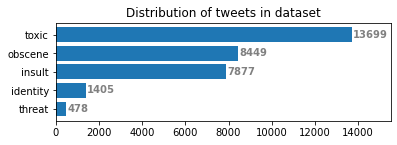

In [11]:
import matplotlib.pyplot as plt
import numpy as np

counter = np.array(counter)

idx = np.argsort(counter)

x = labs[idx]
y = counter[idx]

#x = x[1:]
#y = y[1:]

fig, ax = plt.subplots(figsize = (6,1.8))
ax.barh(x,y)
ax.set_xlim([0, 15500])
for i, v in enumerate(y):
    ax.text(v + 50, i - 0.15, str(v), color="gray", fontweight='bold')
plt.title("Distribution of tweets in dataset")
plt.show()

In [12]:
target = "toxic"
subdf = df[df["label"] == target]
subdf["text"].tolist()[41:60]

['Fucked with the wrong muchacho. 21:19, July 23, 2005 (UTC)',
 'Add Mobile porn as additional WP:ALSO link',
 "F**K ALL RIDES AT WORLDS OF FUN I hate all rides at Worlds of Fun because they are sh_tty and boring. All ride operators at WOF should be fired sued and hanged. Burn all WOF coasters. Arrest all WOF park operators! Assassinate all WOF customers! I heard that a boy died on Timberwolf on August, 2014. That's stupid! Worlds of Fun should have nown better to built that sh_t ride. Worlds Of Fun cares about money and prophet moar than they're customers. Burn that sh_t park down! F**K YOU RIDES! WorldS Of Fun is dangerouser than GRround Zero and Area 51. Worlds of Fun should burn in Hell!",
 '"""Nazi filth"" is impolite 04:27, 20 Jan 2004 (UTC)"',
 "I don't care what you say here. I don't believe one sentence anymore.",
 "I can tell you what the argument is about here newseventsguy. It's about YOUR retroactive reversion of a simple edit trying to include secondary independent verifi

In [13]:
target = "identity"
subdf = df[df["label"] == target]
subdf["text"].tolist()[1:20]

['A pair of jew-hating weiner nazi schmucks.',
 "I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms",
 'Kill all niggers. I have hard, that others have said this.. should this be included? That racists sometimes say these.',
 'u r a tw@ fuck off u gay boy.U r smelly.Fuck ur mum poopie',
 'Gay The existence of CDVF is further proof that is a sad twat. He is also very ugly, and has a willy for a face.',
 'DictionariesHow dare you call my contribution spam!!! I am a Kurd and I made a lsit of kurdish dictionaries. you bloody turkish nationalist and atoricity commiting bone breaking Nazi. watch out folk this slimy Turk is trying to censor the internet this is not undemocratic Turkey here, no prison cells in wikipedia you stupid Turk! And you buggers want membership to the EEC',
 'you gay motherfucker i know where you live,i am going to sand your face off,then i am to going to beat you to a pulp,you chicken shagger

In [14]:
target = "insult"
subdf = df[df["label"] == target]
subdf["text"].tolist()[1:20]

["You are gay or antisemmitian? Archangel WHite TigerMeow! Greetingshhh!Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!Beware of the Dark Side!",
 'FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!',
 'Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!',
 '=Tony Sidaway is obviously a fistfuckee. He loves an arm up his ass.',
 "All of my edits are good. Cunts like you who revert good edits because you're too stupid to understand how to write well , and then revert other ed

In [15]:
target = "obscene"
subdf = df[df["label"] == target]
subdf["text"].tolist()[1:20]

["You are gay or antisemmitian? Archangel WHite TigerMeow! Greetingshhh!Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!Beware of the Dark Side!",
 'FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!',
 "GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK THAT YOU CANT PUT DOWN???/ GET FUCK UP GET FUCKED UP. I'M FUCKED UP RIGHT NOW!",
 'Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!',
 '=Tony Sidaway is obviously a fistfuckee. He loves an arm up his ass.',
 "My Band Page's delet

In [16]:
target = "threat"
subdf = df[df["label"] == target]
subdf["text"].tolist()[20:40]

['Wtf, Why You deleting Maashel? Bad things will happen to you now.',
 'How dare you send me such abuse you fucking cockmaster!If you dare warn me again, Mr Jeff. I will savagely attack your mother!I know where you live',
 'To Huldra I sincerely hope you die. 124.180.167.228',
 '" Lock Down I don\'t know about the ""Bulgarian BULLSHIT season"", but don\'t be fooled from where exactly i connect. If i see you editing, or someone else you send, the DDA40X article one more time, you will spend the next few years in prison. I will arrange you a meeting with certain people for suspicions of terrorism. Yes. I can do that. A terror suspect nowadays, you can kiss your young life goodbye. If you file complaints and i\'m banned, you and your naked ass will have the whole time in the world, in the cell block, to think what went wrong. 87.252.167.254 "',
 "Who the HELL do you think you are? How dare you revert my edit to Quillacollo Province. I was making a friend smile, and you ruined it. In doing